(50000, 28, 28) (50000,)


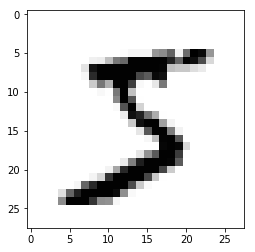

In [69]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [6]:
import tensorflow as tf
import numpy as np
s = tf.InteractiveSession()

In [7]:
np.random.seed(0)

In [8]:
#reshaping the imput data
pixels = X_train.shape[1] * X_train.shape[2]
X_train_reshape = X_train.reshape([50000, pixels])
X_val_reshape = X_val.reshape([10000, pixels])
X_test_reshape = X_test.reshape([10000, pixels])
output_classes = 10
y_train_onehot = np.eye(output_classes)[y_train]
y_test_onehot = np.eye(output_classes)[y_test]
y_val_onehot = np.eye(output_classes)[y_val]

In [9]:
#initialize the input placeholder
input_X = tf.placeholder('float32', shape=(None,pixels))
input_y = tf.placeholder('int32', shape= (None, output_classes))

In [25]:
## function to train neural net given training dataset, validation dataset, optimizer, probabilities, loss_function
## number of iterations, batch size,
## output: train accuracy, validation accuracy, train loss, validation loss
def train(X_train, y_train, X_val, y_val, optimizer,probs, loss, num_iters = 10,batch_size = 200):
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []
    num_train = X_train.shape[0]
    iters_per_epoch = int(max(num_train/batch_size, 1))
    for it in range(num_iters):
        for batch in range(iters_per_epoch):
            sampleInds = np.random.choice(range(num_train), batch_size)
            X_batch = X_train[sampleInds]
            y_batch = y_train[sampleInds]
            s.run(optimizer, {input_X: X_batch, input_y: y_batch})
        loss_log = s.run(loss, {input_X: X_train, input_y: y_train})
        train_loss.append(loss_log)
        val_loss.append(s.run(loss, {input_X: X_val, input_y: y_val}))
        print(it,loss_log)
#         print("loss at iter %i:%.4f" % (it, loss))
#         print("train auc",accuracy_score(y_train_onehot, s.run(probs, {input_X: X_train})))
        correct_prediction = tf.equal(tf.argmax(probs,1), tf.argmax(input_y,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        train_acc.append(accuracy.eval(feed_dict = {input_X: X_train, input_y: y_train}))
        val_acc.append(accuracy.eval(feed_dict = {input_X: X_val, input_y: y_val}))
        print('train accuracy', train_acc[it])
        print('test accuracy', val_acc[it])
    return (train_acc, val_acc, train_loss, val_loss)

In [29]:
## general fuction for ploting train and validation loss
def plot_loss(train_loss, val_loss, title, ylabel):
    import matplotlib.pyplot as plt
    %matplotlib inline
    x = np.arange(len(train_loss)) + 1
    plt.plot(x, train_loss, label= 'train_data')
    plt.plot(x, val_loss, label= 'val_data')
    plt.xlabel('Iters')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

In [14]:
#logistic layer
logit_W = tf.Variable(initial_value= np.random.randn(pixels, output_classes).astype(np.float32), name= 'logit_W')
logit_B = tf.Variable(initial_value= np.zeros(output_classes, dtype= 'float32'), name= 'logit_B')

#forward propagation
logits = tf.nn.softmax(tf.matmul(input_X, logit_W) + logit_B)

#loss
logitLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= input_y, logits= logits))

logitOptimizer = tf.train.GradientDescentOptimizer(0.5).minimize(logitLoss, var_list = [logit_W, logit_B])

In [17]:
# train muti logistic regression
s.run(tf.global_variables_initializer())
logit_train_acc, logit_val_acc, logit_train_loss, logit_val_loss = train(X_train_reshape, y_train_onehot,X_val_reshape,y_val_onehot,logitOptimizer, logits,logitLoss, num_iters= 100)

0 2.16332
train accuracy 0.29148
test accuracy 0.3016
1 2.05039
train accuracy 0.40534
test accuracy 0.4222
2 1.98038
train accuracy 0.47696
test accuracy 0.4905
3 1.94105
train accuracy 0.5173
test accuracy 0.5284
4 1.91053
train accuracy 0.5479
test accuracy 0.5584
5 1.8807
train accuracy 0.57866
test accuracy 0.5914
6 1.85841
train accuracy 0.601
test accuracy 0.6114
7 1.84547
train accuracy 0.61428
test accuracy 0.6236
8 1.8364
train accuracy 0.62362
test accuracy 0.6325
9 1.82988
train accuracy 0.62998
test accuracy 0.6378
10 1.82315
train accuracy 0.63686
test accuracy 0.6453
11 1.81212
train accuracy 0.64798
test accuracy 0.658
12 1.78764
train accuracy 0.67258
test accuracy 0.6842
13 1.75345
train accuracy 0.70722
test accuracy 0.7221
14 1.73403
train accuracy 0.72676
test accuracy 0.7436
15 1.71979
train accuracy 0.74132
test accuracy 0.7582
16 1.70962
train accuracy 0.7514
test accuracy 0.7678
17 1.70107
train accuracy 0.76038
test accuracy 0.7753
18 1.69361
train accuracy 0.

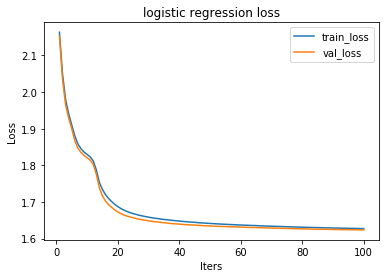

In [28]:
#plot log loss
plot_loss(logit_train_loss, logit_val_loss, 'logistic regression loss', 'Loss')

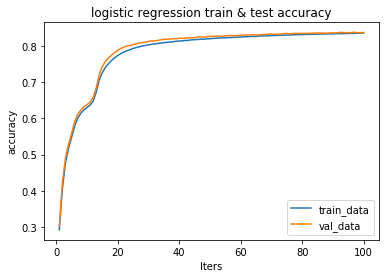

In [30]:
#plot accuracy 
plot_loss(logit_train_acc, logit_val_acc, 'logistic regression train & test accuracy', 'accuracy')

In [44]:
#initialize weights for one hidden layer
hidden_node = 100

two_layer_W1 = tf.Variable(initial_value= np.random.randn(pixels, hidden_node).astype(np.float32), name= 'two_layer_W1')
two_layer_b1 = tf.Variable(initial_value= np.zeros(hidden_node, dtype= 'float32'), name= 'two_layer_b1')
two_layer_W2 = tf.Variable(initial_value= np.random.randn(hidden_node, output_classes).astype(np.float32), name= 'two_layer_W2')
two_layer_b2 = tf.Variable(initial_value= np.zeros(output_classes, dtype= 'float32'), name= 'two_layer_b2')

#forward propagation
two_layer_H1 = tf.nn.relu(tf.matmul(input_X, two_layer_W1) + two_layer_b1)
two_layer_probs = tf.nn.softmax(tf.matmul(two_layer_H1, two_layer_W2) + two_layer_b2)

# loss
two_layer_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= input_y, logits= two_layer_probs))
#optimizer
two_layer_optimizer = tf.train.RMSPropOptimizer(0.005).minimize(two_layer_loss, var_list = [two_layer_W1, two_layer_W2, two_layer_b1, two_layer_b2])

In [74]:
# train two hidden layer networ
s.run(tf.global_variables_initializer())
two_layer_train_acc, two_layer_val_acc, two_layer_train_loss, two_layer_val_loss = train(X_train_reshape, y_train_onehot,X_val_reshape,y_val_onehot,two_layer_optimizer, two_layer_probs, two_layer_loss, num_iters= 100)

0 1.99754
train accuracy 0.46236
test accuracy 0.4704
1 1.82539
train accuracy 0.63492
test accuracy 0.6432
2 1.82668
train accuracy 0.63368
test accuracy 0.6418
3 1.79215
train accuracy 0.6685
test accuracy 0.668
4 1.79163
train accuracy 0.66904
test accuracy 0.6678
5 1.79086
train accuracy 0.66966
test accuracy 0.6699
6 1.79193
train accuracy 0.66876
test accuracy 0.6669
7 1.72713
train accuracy 0.73362
test accuracy 0.7346
8 1.71682
train accuracy 0.74382
test accuracy 0.7447
9 1.70805
train accuracy 0.75264
test accuracy 0.7525
10 1.70564
train accuracy 0.7551
test accuracy 0.754
11 1.70249
train accuracy 0.75818
test accuracy 0.7582
12 1.70277
train accuracy 0.75788
test accuracy 0.7564
13 1.69659
train accuracy 0.76432
test accuracy 0.7621
14 1.6975
train accuracy 0.76322
test accuracy 0.7594
15 1.69564
train accuracy 0.76496
test accuracy 0.7621
16 1.69486
train accuracy 0.76582
test accuracy 0.7638
17 1.69256
train accuracy 0.76822
test accuracy 0.7652
18 1.6925
train accuracy 

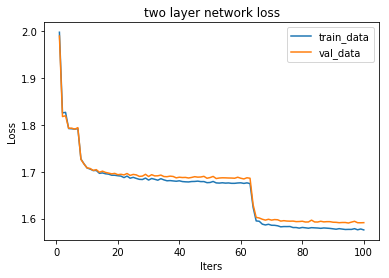

In [75]:
#plot log loss
plot_loss(two_layer_train_loss, two_layer_val_loss, 'two layer network loss', 'Loss')

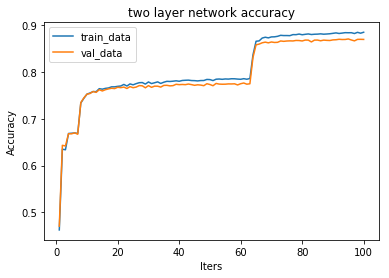

In [76]:
#plot accuracy
plot_loss(two_layer_train_acc, two_layer_val_acc, 'two layer network accuracy', 'Accuracy')

In [49]:
#Network to beat all the previou networks
hidden_node1 = 256
hidden_node2 = 128

W1 = tf.Variable(initial_value= np.random.randn(pixels, hidden_node1).astype(np.float32), name= 'W1')
b1 = tf.Variable(initial_value= np.zeros(hidden_node1, dtype= 'float32'), name= 'b1')
W2 = tf.Variable(initial_value= np.random.randn(hidden_node1, hidden_node2).astype(np.float32), name= 'W2')
b2 = tf.Variable(initial_value= np.zeros(hidden_node2, dtype= 'float32'), name= 'b2')
W3 = tf.Variable(initial_value= np.random.randn(hidden_node2, output_classes).astype(np.float32), name= 'W3')
b3 = tf.Variable(initial_value= np.zeros(output_classes, dtype= 'float32'), name= 'b3')

In [59]:
#forward propagation
H1 = tf.nn.relu(tf.matmul(input_X, W1) + b1)
H2 = tf.nn.sigmoid(tf.matmul(H1,W2) + b2)
probs = tf.nn.softmax(tf.matmul(H2,W3) + b3)

#calculate loss
#reg = tf.nn.l2_loss(W1) + tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3) + tf.nn.l2_loss(b1) + tf.nn.l2_loss(b2) + tf.nn.l2_loss(b3)
loss_3layer = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= input_y, logits= probs))
# loss = tf.losses.log_loss(input_y, probs)

In [60]:
# optimizer
# optimizer = tf.train.MomentumOptimizer(0.05, 0.9).minimize(loss, var_list = [W1, b1, W2, b2, W3, b3])
optimizer = tf.train.RMSPropOptimizer(0.005).minimize(loss_3layer, var_list = [W1, b1, W2, b2, W3, b3])
# optimizer = tf.train.AdamOptimizer(0.01).minimize(loss, var_list = [W1, b1, W2, b2, W3, b3])

In [71]:
s.run(tf.global_variables_initializer())
# s.run(probs, {input_X: X_train_reshape}).shape
final_train_acc, final_val_acc, final_train_loss, final_val_loss = train(X_train_reshape, y_train_onehot,X_val_reshape,y_val_onehot,optimizer, probs,loss_3layer, num_iters= 100)
# X_train_reshape.shape
# y_train.shape
# s.run(input_y, {input_X: X_train_reshape, input_y: y_train.astype(np.int32)})

0 1.86788
train accuracy 0.59282
test accuracy 0.6015
1 1.68436
train accuracy 0.78114
test accuracy 0.7876
2 1.58536
train accuracy 0.88128
test accuracy 0.8877
3 1.56616
train accuracy 0.89916
test accuracy 0.9003
4 1.54777
train accuracy 0.91698
test accuracy 0.9218
5 1.54442
train accuracy 0.9191
test accuracy 0.9219
6 1.53487
train accuracy 0.9288
test accuracy 0.9329
7 1.53136
train accuracy 0.93194
test accuracy 0.9355
8 1.52555
train accuracy 0.9373
test accuracy 0.9412
9 1.52621
train accuracy 0.9366
test accuracy 0.9418
10 1.52561
train accuracy 0.9372
test accuracy 0.9408
11 1.52586
train accuracy 0.93664
test accuracy 0.9356
12 1.522
train accuracy 0.94076
test accuracy 0.9388
13 1.52796
train accuracy 0.93506
test accuracy 0.9359
14 1.52177
train accuracy 0.94118
test accuracy 0.9373
15 1.52078
train accuracy 0.94214
test accuracy 0.9412
16 1.51571
train accuracy 0.94708
test accuracy 0.9465
17 1.51625
train accuracy 0.94576
test accuracy 0.9445
18 1.5162
train accuracy 0.

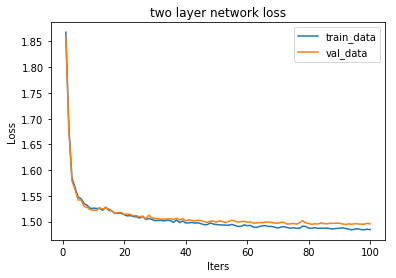

In [72]:
#plot log loss
plot_loss(final_train_loss, final_val_loss, 'three layer network loss', 'Loss')

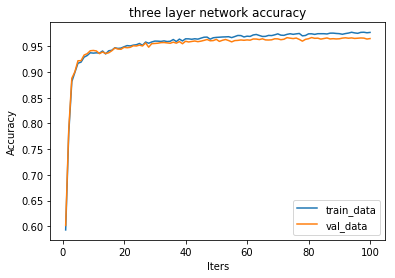

In [73]:
#plot log loss
plot_loss(final_train_acc, final_val_acc, 'three layer network accuracy', 'Accuracy')